In [21]:
import numpy as np
import matplotlib.pyplot as plt

## SVM_LOSS

![](https://user-images.githubusercontent.com/36406676/52391717-12ece000-2ae2-11e9-8789-057790ae606b.PNG)

In [4]:
def SVM_Loss(y, t): # t는  라벨
    a = 0
    for i in range(len(y)):
        b = max(0, y[i]-y[t]+1)
        a += b
    return a - 1

y1 = [3.2, 5.1, -1.7]
y2 =  [1.3, 4.9, 2.0]
y3 = [2.2, 2.5, -3.1]

t0 = 0
t1 = 1
t2 = 2


print(SVM_Loss(y1,t0)) # 2.89
print(SVM_Loss(y2,t1)) # 0
print(SVM_Loss(y3,t2)) # 12.9

2.8999999999999995
0.0
12.9


## Softmax

![](https://user-images.githubusercontent.com/36406676/52392080-b12d7580-2ae3-11e9-88fc-d2cf4ef9f5ff.PNG)

In [5]:
def softmax(a): # 지수함수를 계산할 때 값이 커지면 nan이 계산됨
    c = np.max(a)
    exp_a = np.exp(a-c) # 소프트 맥스의 지수함수를 계산할 떄 어떤 정수를 더해도 결과는 바뀌지 않는다는 점을 이용
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

a = [3.2, 5.1, -1.7]

print(softmax(a)) # 0.12998, 0.869049 0.000967

[0.12998254 0.86904954 0.00096793]


![](https://user-images.githubusercontent.com/36406676/52392458-3b2a0e00-2ae5-11e9-924a-9d7b243407ba.PNG)

In [8]:
y1 = [-2.85, 0.86, 0.28]
t0 = 2
print(SVM_Loss(y1,t0)) 

1.58


In [10]:
def cross_entropy_error(y, t): # t는 라벨
    delta = 1e-7
    return -np.sum(t* np.log(y + delta)) #np.log는 자연로그

t0 = [0,0,1]
cross_entropy_error(softmax(y1),t0)

1.0401902864545256

![](https://user-images.githubusercontent.com/36406676/52392832-f30beb00-2ae6-11e9-9625-b8bdf1679597.PNG)

In [19]:
## svm
t0 = 0

print(SVM_Loss([10,-2,3],0))
print(SVM_Loss([10.01,-2,3],0))

print('-'*50)

## Softmax
t0 = [1,0,0]

print(cross_entropy_error(softmax([10,-2,3]),t0))
print(cross_entropy_error(softmax([10.1,-2,3]),t0))

0
0.0
--------------------------------------------------
0.0009175049577967678
0.0008302195426778567


![](https://user-images.githubusercontent.com/36406676/52393533-cdccac00-2ae9-11e9-861f-460c4c8dbf85.PNG)

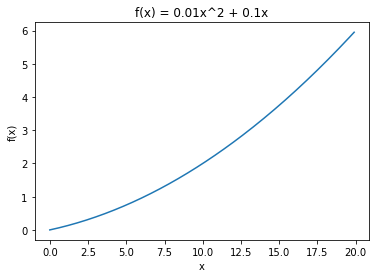

0.1999999999990898
0.2999999999986347


In [30]:
## Numerical_diff
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = 0.01x^2 + 0.1x")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5)) # 0.199999
print(numerical_diff(function_1,10)) # 0.299999

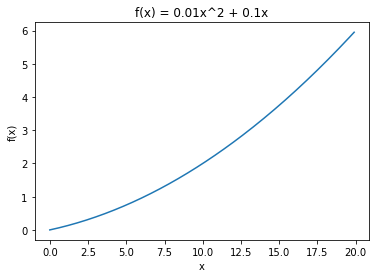

0.1999999999990898
0.2999999999986347


In [29]:
## P